<a href="https://colab.research.google.com/github/rizalpangestu1/Machine-Learning/blob/main/Distribusi_Kelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, Callback
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from ipywidgets import FileUpload
import io

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')
# Dataset directory
DATASET_DIR = '/content/drive/MyDrive/C242-PS284/Gym Dataset Cropped'

Mounted at /content/drive


In [ ]:
import os

def convert_all_images_to_rgba(dataset_dir):
    """
    Convert all images in a dataset directory to RGBA if necessary.

    Parameters:
    - dataset_dir: Path to the dataset directory.
    """
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                # Convert to RGBA if necessary
                if img.mode in ('P', 'L', 'LA') or ('transparency' in img.info):
                    img = img.convert('RGBA')
                    img.save(file_path)  # Overwrite the original file
                    print(f"Converted: {file_path}")
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Path to your dataset
DATASET_DIR = '/content/drive/MyDrive/C242-PS284/Gym Dataset Cropped'

# Convert all images
convert_all_images_to_rgba(DATASET_DIR)

# Function to display sample images
def display_sample_images(data_dir, max_classes=19):
    """
    Display one sample image from each class in the dataset.
    """
    try:
        classes = [cls for cls in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cls))]
        plt.figure(figsize=(15, 10))

        for i, cls in enumerate(classes[:max_classes]):
            cls_path = os.path.join(data_dir, cls)
            if os.path.isdir(cls_path):
                image_files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
                if image_files:
                    image_path = os.path.join(cls_path, image_files[0])
                    img = preprocess_image(image_path)

                    plt.subplot(4, 5, i + 1)
                    plt.imshow(img)
                    plt.title(cls)
                    plt.axis('off')

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error displaying images: {e}")

# Display sample images
display_sample_images(DATASET_DIR)


Error processing /content/drive/MyDrive/C242-PS284/Gym Dataset Cropped/Dumbells/Rubber-Hex-Dumbbells.jpg: cannot identify image file '/content/drive/MyDrive/C242-PS284/Gym Dataset Cropped/Dumbells/Rubber-Hex-Dumbbells.jpg'
Error processing /content/drive/MyDrive/C242-PS284/Gym Dataset Cropped/Bench Press/imageBench03.jpg: cannot write mode RGBA as JPEG
Error processing /content/drive/MyDrive/C242-PS284/Gym Dataset Cropped/Smith Machine/optimized---media_1323360_73093: unknown file extension: 
Error processing /content/drive/MyDrive/C242-PS284/Gym Dataset Cropped/PullBar/pullBars_66.jpg: cannot write mode RGBA as JPEG
Error processing /content/drive/MyDrive/C242-PS284/Gym Dataset Cropped/PullBar/pullBars_70.jpg: cannot write mode RGBA as JPEG
Error processing /content/drive/MyDrive/C242-PS284/Gym Dataset Cropped/Swiss Ball/Swiss-Ball_26_cropped_0.jpeg: cannot write mode RGBA as JPEG
Error processing /content/drive/MyDrive/C242-PS284/Gym Dataset Cropped/Swiss Ball/Swiss-Ball_32_cropped_0

<Figure size 1500x1000 with 0 Axes>

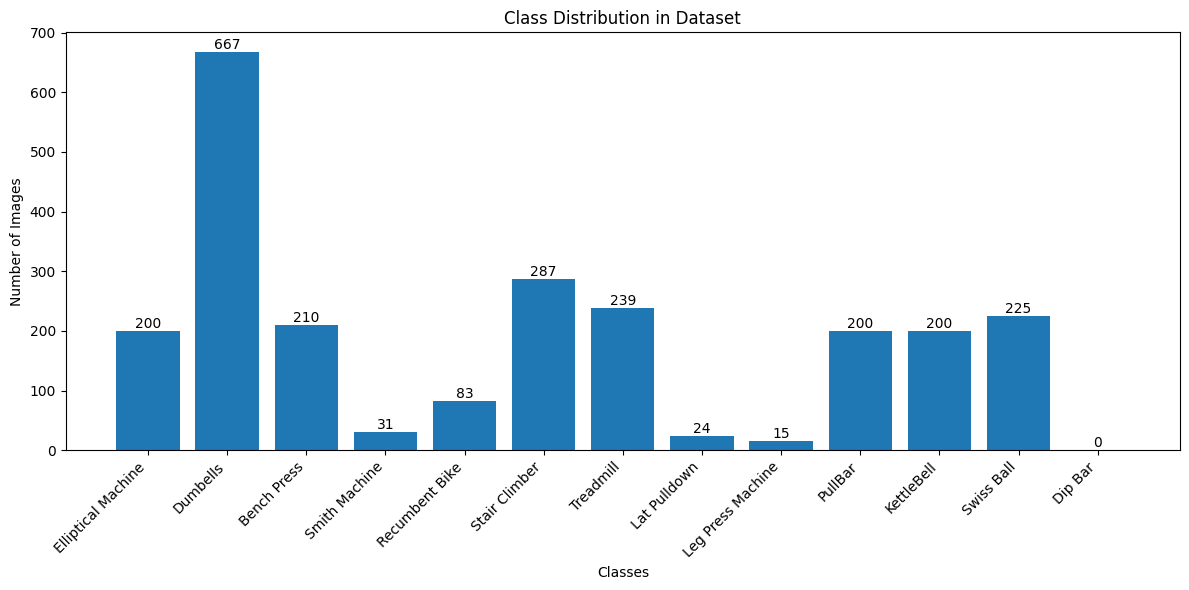

In [ ]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(data_dir):
    """
    Plot the distribution of images across classes in the dataset, including labels on the bars.

    Parameters:
    - data_dir: Path to the dataset directory where each class has its own subdirectory.
    """
    try:
        # List all classes (subdirectories) in the dataset directory
        classes = [cls for cls in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cls))]
        class_counts = []

        # Count the number of images in each class
        for cls in classes:
            cls_path = os.path.join(data_dir, cls)
            num_images = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])
            class_counts.append(num_images)

        # Plot the distribution
        plt.figure(figsize=(12, 6))
        bars = plt.bar(classes, class_counts, tick_label=classes)

        # Add labels to the bars
        for bar, count in zip(bars, class_counts):
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # x position
                bar.get_height(),                  # y position (height of the bar)
                str(count),                        # the label (number of images)
                ha='center', va='bottom'           # align the text
            )

        plt.xticks(rotation=45, ha='right')
        plt.title('Class Distribution in Dataset')
        plt.xlabel('Classes')
        plt.ylabel('Number of Images')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error plotting class distribution: {e}")

plot_class_distribution(DATASET_DIR)
